Principal Component Analysis [PCA]

In [1]:
# Importing Library
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data from MNIST Digits
df = pd.read_csv('./train.csv')

In [3]:
# first the rows in dataset
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# save the labels into a variable 
l = df['label']

In [5]:
# Drop the label feature and store the pixel data in data
d=df.drop('label', axis=1)

In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


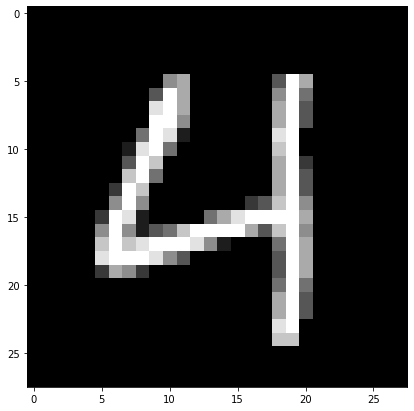

In [7]:
#display or plot a number
plt.figure(figsize=(7,7))
idx=205
# reshape from 1d to 2d
grid_data= d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

In [8]:
# Print the digit 
print(l[idx])

4


2D VISUALIZATION USING PCA

In [9]:
# I'm taking 5K data-points to work 

labels = l.head(5000)
data = d.head(5000)

print("The shape of sample data = ", data.shape)

The shape of sample data =  (5000, 784)


In [10]:
# Data-preprocessing : Standardizing the data 
 
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(5000, 784)


In [11]:
# To find the Co-variance matrix which is A^T * A  
sample_data = standardized_data

# Matrix-multiplication using numpy

covariance_matrix = np.matmul(sample_data.T, sample_data)

print("The shape of covariance matrix = ", covariance_matrix.shape)

The shape of covariance matrix =  (784, 784)


In [12]:
# Finding the top two eigen-values and corresponding eigen-vectors for projecting onto 2D space

from scipy.linalg import eigh 

# The parameter 'eigvals' is defined (low value to heigh value)
# eigh function will return the eigen values in ascending order    
# this code generates only the top 2 (782 and 783) eigen values.

values, vectors = eigh(covariance_matrix, eigvals =(782,783))

print("Shape of eigen vectors = ", vectors.shape)

# converting the eigen vectors into (2,d) shape
vectors = vectors.T

print("Updated shape of eigen vectors = ", vectors.shape)
# Vectors[1] - eigen vector corresponding to 1st principal  
# Vectors[0] - eigen vector corresponding to 2nd principal 

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [13]:
# projecting the original data sample on the plane formed by 
# two principal eigen vectors by vector-vector multiplication

new_coordinates = np.matmul(vectors,sample_data.T)

print("Resultant new data points shape ", vectors.shape, "X", sample_data.T.shape, " = ", new_coordinates.shape)

Resultant new data points shape  (2, 784) X (784, 5000)  =  (2, 5000)


In [14]:
# appending label to the 2D projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for plotting the labeled points
dataframe=pd.DataFrame(data=new_coordinates,columns=('1st_principal','2nd_principal','label'))
print(dataframe.head())


   1st_principal  2nd_principal  label
0      -5.097103      -5.173464    1.0
1       6.514093      19.077598    0.0
2      -1.785114      -7.722903    1.0
3       5.741095      -0.550683    4.0
4       6.771353      26.228808    0.0


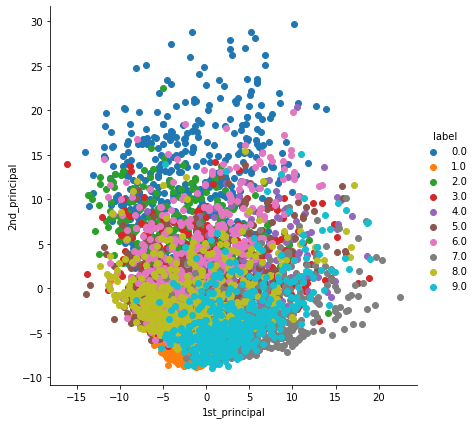

In [15]:
# plotting the 2D data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe,hue='label', size=6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

PCA using Scikit-Learn

In [16]:
# Initializing the PCA

from sklearn import decomposition
pca = decomposition.PCA()


In [17]:
# configuring the parameters the number of components =2 
pca.n_components=2
pca_data =pca.fit_transform(sample_data)

# pca_reduced will contain the 2d projects of simple data
print("Shape of pca_reduced.shape = ", pca_data.shape)

Shape of pca_reduced.shape =  (5000, 2)


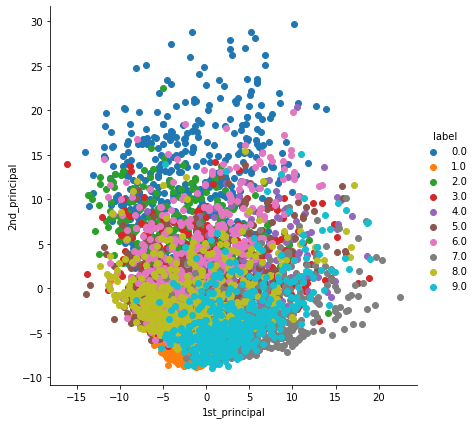

In [18]:
# attaching the label for each 2D data point
pca_data = np.vstack((pca_data.T,labels)).T

# creating a new data frame which helps us in plotting the result data
pca_df =pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','label'))
sns.FacetGrid(dataframe,hue='label', size=6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

PCA for Dimensionality Reduction [not for Visualization]

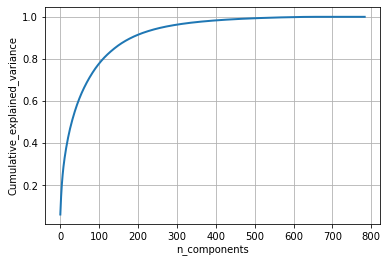

In [19]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# plot the PCA specturm
plt.figure(1,figsize =(6,4))

plt.clf()

plt.plot(cum_var_explained,linewidth =2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()